# Revision Code

In [1]:
using LinearAlgebra, ColorBitstring, Plots, Test
import Base: getindex, setindex, size, *, \

# Lab 1

In [27]:
sizeof(UInt32), typeof(5)

(4, Int64)

In [31]:
printlnbits(typemax(Int8)) # 2^7-1 = 127
printbits(typemin(Int8)) # -2^7 = -128

01111111
10000000

Conversion:

In [30]:
Int(0b101101), reinterpret(Int8, 0b11111111), parse(Int8, "11"; base=2), parse(Int8, "00001011"; base=2), parse(Int8, "-00001011"; base=2)

(45, -1, 3, 11, -11)

Combine `parse`, `reinterpret`, and `UInt8` to convert the
above string to a (negative) `Int8` with the specified bits.

In [ ]:
x = reinterpret(Int8, parse(UInt8, "10001011"; base=2)) # -117
bitstring(x)

In [ ]:
UInt8(120) + UInt8(10) # returns 0x82 = 8*16+2 = 130

Int8(120) + Int8(10) # returns -126 since mod(-126,2^8) == 130

UInt8(2)^7 # Returns 0x80 = 8*16 = 128

Int8(2)^7 # Retuns -128 since mod(-128,2^8) == 128

Int8(2)^8 # Returns 0 since mod(2^8, 2^8) == 0

Concatenating a string:

In [ ]:
"hi" * "bye"

`Rational` implementation in question 4 of lab 1.

# Lab 2
$$
F_{σ,Q,S} := F^{\rm normal}_{σ,Q,S} \cup F^{\rm sub}_{σ,Q,S} \cup F^{\rm special}.
$$
The _normal numbers_
$F^{\rm normal}_{σ,Q,S} ⊂ ℝ$ are
$$
F^{\rm normal}_{σ,Q,S} := \{± 2^{q-σ} × (1.b_1b_2b_3…b_S)_2 : 1 ≤ q < 2^Q-1 \}.
$$
The _sub-normal numbers_ $F^{\rm sub}_{σ,Q,S} ⊂ ℝ$ are
$$
F^{\rm sub}_{σ,Q,S} := \{± 2^{1-σ} × (0.b_1b_2b_3…b_S)_2\}.
$$
The _special numbers_ $F^{\rm special} ⊄ ℝ$ are 
$$
F^{\rm special} :=  \{∞, -∞, {\rm NaN}\}
$$
where ${\rm NaN}$ is a special symbol representing "not a number", essentially an error flag.

Note this set of real numbers has no nice _algebraic structure_: it is not closed under addition, subtraction, etc.
On the other hand, we can control errors effectively hence it is extremely useful for analysis.

Floating-point numbers are stored in $1 + Q + S$ total number of bits, in the format
$$
sq_{Q-1}…q_0 b_1 …b_S
$$
The first bit ($s$) is the <span style="color:red">sign bit</span>: 0 means positive and 1 means
negative. The bits $q_{Q-1}…q_0$ are the <span style="color:green">exponent bits</span>:
they are the binary digits of the unsigned integer $q$: 
$$
q = (q_{Q-1}…q_0)_2.
$$
Finally, the bits $b_1…b_S$ are the <span style="color:blue">significand bits</span>.
If $1 ≤ q < 2^Q-1$ then the bits represent the normal number
$$
x = ± 2^{q-σ} × (1.b_1b_2b_3…b_S)_2.
$$
If $q = 0$ (i.e. all bits are 0) then the bits represent the sub-normal number
$$
x = ± 2^{1-σ} × (0.b_1b_2b_3…b_S)_2.
$$
If $q = 2^Q-1$  (i.e. all bits are 1) then the bits represent a special number, discussed
later.

IEEE has 3 standard floating-point formats: 16-bit (half precision), 32-bit (single precision) and
64-bit (double precision) defined by:
$$
\begin{align*}
F_{16} &:= F_{15,5,10} \\
F_{32} &:= F_{127,8,23} \\
F_{64} &:= F_{1023,11,52}
\end{align*}
$$

`Interval` implementation for multiplication, division, addition, subtraction, ones, in.
You can probably ignore the `T = promote_type(...)` line for now: it is simply finding the right type
to change the rounding mode by finding the "bigger" of the type of `A.a` and `B.a`. So in the examples below
`T` will just become `Float64`.
Finally, the code block
```julia
setrounding(T, RoundDown) do

end
```
changes the rounding mode of floating point operations corresponding to the type `T` of the CPU, for any code between
the `do` and the `end`.

_Machine epsilon_ is denoted
$$
ϵ_{{\rm m},S} := 2^{-S}.
$$
When $S$ is implied by context we use the notation $ϵ_{\rm m}$.
The _smallest positive normal number_ is $q = 1$ and $b_k$ all zero:
$$
\min |F_{σ,Q,S}^{\rm normal}| = 2^{1-σ}
$$ 
where $|A| := \{|x| : x \in A \}$.
The _largest (positive) normal number_ is 
$$
\max F_{σ,Q,S}^{\rm normal} = 2^{2^Q-2-σ} (1.11…)_2 = 2^{2^Q-2-σ} (2-ϵ_{\rm m})
$$

# Lab 3
Easier way to write an if condition block:

In [ ]:
# helper function to avoid trying to take logs of 0 in plots
# use in plots below
# Here COND ? EXPR1 : EXPR2
# is another way to write
# if COND
#     EXPR1
# else
#     EXPR2
# end
nanabs = x -> iszero(x) ? NaN : abs(x)

In particular, for divided differences, we consider the following approximations:
*Forward differences*:
$$
f'(x) ≈ {f(x+h) - f(x) \over h}
$$
*Central differences*:
$$
f'(x) ≈ {f(x+h) - f(x-h) \over 2h}
$$
*Second order differences*:
$$
f''(x) ≈ {f(x+h) - 2f(x) + f(x-h) \over h^2}
$$

Central difference error:

In [ ]:
h = 2.0 .^ (0:-1:-60)
f = x -> 1+x+x^2
g = x -> 1+x/3+x^2

df = x -> 1 + 2*x
dg = x -> 1/3 + 2*x

central_diff = (f,x,h) -> (f.(x .+ h) .- f.(x .- h)) ./ (2 .* h)

x = 0.0 

plot(nanabs.(central_diff(f,x,h) .- df(x)); yscale=:log10, label='f')
plot!(nanabs.(central_diff(g,x,h) .- dg(x)); yscale=:log10, label='g')

All the derivative for complicated functions:
$$
\exp(\exp x \cos x + \sin x), ∏_{k=1}^{1000} \left({x \over k}-1\right), \hbox{ and } f^{\rm s}_{1000}(x).
$$

In [ ]:
x = 0.1
h = sqrt(eps())
hc = cbrt(eps())

forward_diff = (f,x,h) -> (f(x+h) - f(x))/h
central_diff = (f,x,h) -> (f(x + h) - f(x - h)) / (2 * h)
divideddiffsecond = (f,x,h) -> (f(x + h) - 2 * f(x) + f(x - h))/ (h^2)

f1 = x -> exp(exp(x)*cos(x) + sin(x))
f2 = x -> prod([x] ./ (1:1000) .- 1)
function f3(x)
    y = 2 + (x-1)/2
    for i = 1:1000
        y = 2 + (x-1)/(y)
    end
    return y - 1
end

print("First derivative of f1 at $x: ", forward_diff(f1,x,h))
print("\nFirst derivative of f1 at $x: ", central_diff(f1,x,hc))
print("\nSecond derivative of f1 at $x: ", divideddiffsecond(f1,x,hc))

print("\n\nFirst derivative of f2 at $x: ", forward_diff(f2,x,h))
print("\nFirst derivative of f2 at $x: ", central_diff(f2,x,hc))
print("\nSecond derivative of f2 at $x: ", divideddiffsecond(f2,x,hc))

print("\n\nFirst derivative of f3 at $x: ", forward_diff(f3,x,h))
print("\nFirst derivative of f3 at $x: ", central_diff(f3,x,hc))
print("\nSecond derivative of f3 at $x: ", divideddiffsecond(f3,x,hc))

Refer to lab 3 solutions for Dual number implementation. General rule is that 
`f(a+bϵ) = f(a) + b*f'(a)*ϵ`.

## Lab 4
`mul_cols` for dense matrices:

In [2]:
function mul_cols(A,x)
    m,n = size(A)
    b = zeros(eltype(x), m)
    for j=1:n, k=1:m
        b[k] = A[k,j]*x[j]
    end
    b
end


mul_cols (generic function with 1 method)

In [3]:
zeros(Int, 5)
fill(0.0, 5)
[0 for k=1:5]

5-element Vector{Int64}:
 0
 0
 0
 0
 0

In [4]:
ones(Int, 5, 6)
fill(1, 5, 6)
[1 for k=1:5, j=1:6]

5×6 Matrix{Int64}:
 1  1  1  1  1  1
 1  1  1  1  1  1
 1  1  1  1  1  1
 1  1  1  1  1  1
 1  1  1  1  1  1

In [5]:
# Note: (1:5)' is a "row-vector" which behaves differently than a matrix
Matrix((1:5)')

# 2. Broadcast:
#exp.(-(1:5))

# 3. Explicit broadcsat:
#broadcast(k -> exp(-k), 1:5)

# 4. Comprehension:
#[exp(-k) for k=1:5]

1×5 Matrix{Int64}:
 1  2  3  4  5

More on broadcasting

In [6]:
k = 1:5
j = 1:6
cos.(k .+ j')

5×6 Matrix{Float64}:
 -0.416147  -0.989992  -0.653644   0.283662   0.96017    0.753902
 -0.989992  -0.653644   0.283662   0.96017    0.753902  -0.1455
 -0.653644   0.283662   0.96017    0.753902  -0.1455    -0.91113
  0.283662   0.96017    0.753902  -0.1455    -0.91113   -0.839072
  0.96017    0.753902  -0.1455    -0.91113   -0.839072   0.0044257

In [7]:
broadcast((k,j) -> cos(k+j), 1:5, (1:6)')

5×6 Matrix{Float64}:
 -0.416147  -0.989992  -0.653644   0.283662   0.96017    0.753902
 -0.989992  -0.653644   0.283662   0.96017    0.753902  -0.1455
 -0.653644   0.283662   0.96017    0.753902  -0.1455    -0.91113
  0.283662   0.96017    0.753902  -0.1455    -0.91113   -0.839072
  0.96017    0.753902  -0.1455    -0.91113   -0.839072   0.0044257

Triangular matrices `mul_cols`:

In [8]:
function mul_cols(U::UpperTriangular, x)
    n = size(U,1)
    T = promote_type(eltype(x), eltype(U))
    b = zeros(T,n)
    for j = 1:n, k = 1:j
        b[k] += U[k,j] * x[j]
    end
    b
end

function mul_cols(L::LowerTriangular, x)
    n = size(L,1)
    T = promote_type(eltype(x), eltype(L))
    b = zeros(T,n)
    for j = 1:n, k = j:n
        b[k] += L[k,j] * x[j]
    end
    b
end

mul_cols (generic function with 3 methods)

Solving linear systems:

In [9]:
function ldiv(L::LowerTriangular, b)
    n = size(L, 1)
    T = promote_type(eltype(L), eltype(b))
    if length(b) != n
        error("The system is not compatible")
    end
    x = zeros(T, n)

    for k = 1:n
        r = b[k]
        for j = 1:k-1
            r -= L[k,j]*x[j]
        end
        x[k] = r/L[k,k]
    end
    # END
    x
end


function ldiv(U::UpperTriangular, b)
    n = size(L, 1)
    T = promote_type(eltype(U), eltype(b))
    if length(b) != n
        error("The system is not compatible")
    end
    x = zeros(T, n)

    for k = n:-1:1
        r = b[k]
        for j = n:-1:k+1
            r -= U[k,j]*x[j]
        end
        x[k] = r/U[k,k]
    end
    # END
    x
end

L = LowerTriangular(randn(5,5))
b = randn(5)
@test L\b ≈ ldiv(L, b)

U = UpperTriangular(randn(5,5))
b = randn(5)
@test U\b ≈ ldiv(U, b)

Test Passed

In [33]:
A = [1 2 3;
     1 2 4;
     3 7 8]
b = [10, 11, 12]
A \ b

3-element Vector{Float64}:
  41.000000000000036
 -17.000000000000014
   1.0

Upper Tridiagonal matrices:

In [10]:
struct UpperTridiagonal{T} <: AbstractMatrix{T}
    d::Vector{T}   # diagonal entries: d[k] == U[k,k]
    du::Vector{T}  # super-diagonal enries: du[k] == U[k,k+1]
    du2::Vector{T} # second-super-diagonal entries: du2[k] == U[k,k+2]
end

size(U::UpperTridiagonal) = (length(U.d),length(U.d))

function getindex(U::UpperTridiagonal, k::Int, j::Int)
    d,du,du2 = U.d,U.du,U.du2
    if j == k+2
    	return U.du2[k]
    elseif j == k+1
    	return U.du[k]
    elseif j == k
    	return U.d[k]
    else # off band entries are zero
    	return zero(eltype(U))
    end
end

function setindex!(U::UpperTridiagonal, v, k::Int, j::Int)
    d,du,du2 = U.d,U.du,U.du2
    if j > k+2 || j < k
        error("Cannot modify off-band")
    end

    if j == k+2
    	du2[k] = v
    elseif j == k+1
    	du[k] = v
    elseif j == k
    	d[k] = v
    end
    U # by convention we return the matrix
end

function *(U::UpperTridiagonal, x::AbstractVector)
    n = size(U,1)
    T = promote_type(eltype(x),eltype(U))
    b = zeros(T, n)
    for j = 1:n, k = max(j-2,1):j
        b[k] += U[k, j] * x[j]
    end
    b
end

function \(U::UpperTridiagonal, b::AbstractVector)
    n = size(U,1)
    T = promote_type(eltype(b),eltype(U))

    if length(b) != n
        error("The system is not compatible")
    end

    x = zeros(T, n)
    for k = n:-1:1  # start with k=n, then k=n-1, ...
        r = b[k]  # dummy variable
        for j = k+1:min(n, k+2)
            r -= U[k,j]*x[j] # equivalent to r = r - U[k,j]*x[j]
        end
        # after this for loop, r = b[k] - ∑_{j=k+1}^n U[k,j]x[j]
        x[k] = r/U[k,k]
    end
    x
end

n = 1_000_000 # under-scores are like commas: so this is a million: 1,000,000
U = UpperTridiagonal(ones(n), fill(0.5,n-1), fill(0.1,n-2))
x = ones(n)
b = [fill(1.6,n-2); 1.5; 1] # exact result
# note following should take much less than a second
@test U*x ≈ b
@test U\b ≈ x

Test Passed

Householder:

In [ ]:
function householderreflection(x)
    y = copy(x)
    if x[1] == 0
        y[1] += norm(x) 
    else # note sign(z) = exp(im*angle(z)) where `angle` is the argument of a complex number
        y[1] += sign(x[1])*norm(x) 
    end
    w = y/norm(y)
    I - 2*w*w'
end

Householder QR:

In [ ]:
function householderqr(A)
    T = eltype(A)
    m,n = size(A)
    if n > m
        error("More columns than rows is not supported")
    end

    R = zeros(T, m, n)
    Q = Matrix(one(T)*I, m, m)
    Aⱼ = copy(A)

    for j = 1:n
        𝐚₁ = Aⱼ[:,1] # first columns of Aⱼ
        Q₁ = householderreflection(𝐚₁)
        Q₁Aⱼ = Q₁*Aⱼ
        α,𝐰 = Q₁Aⱼ[1,1],Q₁Aⱼ[1,2:end]
        Aⱼ₊₁ = Q₁Aⱼ[2:end,2:end]

        # populate returned data
        R[j,j] = α
        R[j,j+1:end] = 𝐰

        # following is equivalent to Q = Q*[I 0 ; 0 Qⱼ]
        Q[:,j:end] = Q[:,j:end]*Q₁

        Aⱼ = Aⱼ₊₁ # this is the "induction"
    end
    Q,R
end

Householder LQ decomposition:

In [ ]:
function lq(A)
    m,n = size(A)
    m == n || error("not square")
    ## TODO Create Q and L such that A = L*Q, Q'Q == I and L is lower triangular
    L = copy(A)
    Q = Matrix(1.0I, n, n)
    for k = 1:n-1  # make sure k != n
        y = L[k, k:end]
        y[1] -= norm(y)  # here is where we have the key difference
        w = y / norm(y)
        Qₖ = I - 2 * w * w'
        L[k:end, k:end] = L[k:end, k:end] * Qₖ  # reverse order of matrix multiplication
        Q[k:end, :] = Qₖ * Q[k:end, :]
    end
    L,Q
end

## Lab 5
Permutation matrices:

In [11]:
struct PermutationMatrix <: AbstractMatrix{Int}
    p::Vector{Int}
    function PermutationMatrix(p::Vector)
        sort(p) == 1:length(p) || error("input is not a valid permutation")
        new(p)
    end
end

function size(P::PermutationMatrix)
    (length(P.p),length(P.p))
end


function getindex(P::PermutationMatrix, k::Int, j::Int)
    P.p[k] == j ? 1 : 0
end
function *(P::PermutationMatrix, x::AbstractVector)
    x[P.p]
end

p = [1, 4, 2, 5, 3]
P = PermutationMatrix(p)
@test P == I(5)[p,:]

n = 100_000
p = Vector(n:-1:1)
P = PermutationMatrix(p)
x = randn(n)
@test P*x == x[p]

Test Passed

Reflection:

In [12]:
# Represents I - 2v*v'
struct Reflection{T} <: AbstractMatrix{T}
    v::Vector{T}
end

Reflection(x::Vector{T}) where T = Reflection{T}(x/norm(x))

function size(Q::Reflection)
    (length(Q.v),length(Q.v))
end

function getindex(Q::Reflection, k::Int, j::Int)
    if k == j
        1 - 2Q.v[k]*conj(Q.v[j])
    else
        - 2Q.v[k]*conj(Q.v[j])
    end
end

function *(Q::Reflection, x::AbstractVector)
    x - 2*Q.v * dot(Q.v,x) # (Q.v'*x) also works instead of dot
end

function householderreflection(s::Bool, x::AbstractVector)
    y = copy(x) # don't modify `x`
    if s
        y[1] -= norm(x)
    else
        y[1] += norm(x)
    end
    Reflection(y)
end

householderreflection (generic function with 1 method)

Complete the definition of `Reflections` which supports a sequence of reflections,
that is,
$$
Q = Q_{𝐯_1} ⋯ Q_{𝐯_m}
$$
where the vectors are stored as a matrix $V ∈ ℂ^{n × m}$ whose $j$-th column is $𝐯_j∈ ℂ^n$, and
$$
Q_{𝐯_j} = I - 2 𝐯_j 𝐯_j^⋆
$$
is a reflection.

In [13]:
struct Reflections{T} <: AbstractMatrix{T}
    V::Matrix{T}
end

size(Q::Reflections) = (size(Q.V,1), size(Q.V,1))


function *(Q::Reflections, x::AbstractVector)
    m,n = size(Q.V)
    for j = n:-1:1
        x = Reflection(Q.V[:, j]) * x
    end
    x
end

function getindex(Q::Reflections, k::Int, j::Int)
    T = eltype(Q.V)
    m,n = size(Q)
    ej = zeros(T, m)
    ej[j] = one(T)
    return (Q*ej)[k]
end

Y = randn(5,3)
V = Y * Diagonal([1/norm(Y[:,j]) for j=1:3])
Q = Reflections(V)
@test Q ≈ (I - 2V[:,1]*V[:,1]')*(I - 2V[:,2]*V[:,2]')*(I - 2V[:,3]*V[:,3]')
@test Q'Q ≈ I

Test Passed

## Lab 6
Vandermonde matrix:

In [14]:
function vandermonde(𝐱, n) # 𝐱 = [x_1,…,x_m]
    m = length(𝐱)
    # 𝐱 .^ (0:n-1)'
    [𝐱[j]^k for j = 1:m, k = 0:n-1]
end

vandermonde (generic function with 1 method)

Interpolation:

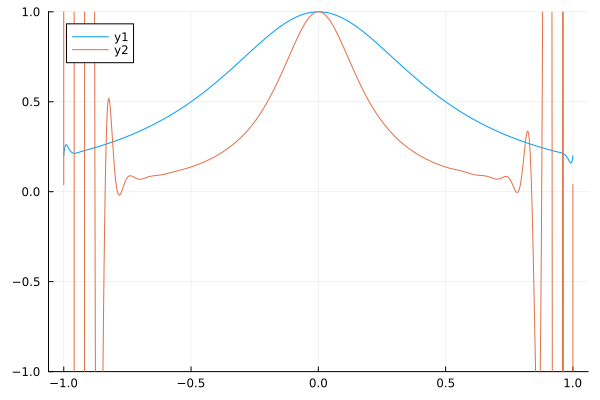

In [15]:
n = 50
𝐱 = range(-1, 1; length=n)
𝐠 = range(-1, 1; length=1000)

# TODO: interpolate 1/(10x^2 + 1) and 1/(25x^2 + 1) at $𝐱$, plotting both solutions evaluated at the grid 𝐠. 
# Use a rectangular Vandermonde matrix to evaluate your polynomial on 𝐠. Remember `plot(𝐱, 𝐟)` will create
# a new plot whilst `plot!(𝐱, 𝐟)` will add to an existing plot.

V = vandermonde(𝐱, n)
V_g = vandermonde(𝐠, n)
f_4 = x -> 1/(4x^2 + 1)
𝐜_4 = V \ f_4.(𝐱)
f_25 = x -> 1/(25x^2 + 1)
𝐜_25 = V \ f_25.(𝐱)

plot(𝐠, V_g*𝐜_4; ylims=(-1,1))
plot!(𝐠, V_g*𝐜_25)

Least square version:

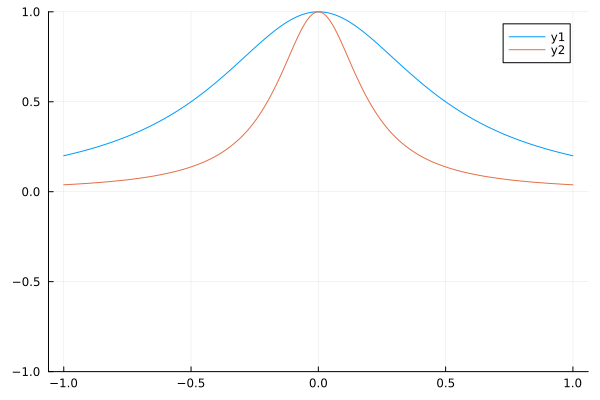

In [16]:
n = 50 # use basis [1,x,…,x^(49)]
𝐱 = range(-1, 1; length=500) # least squares grid
𝐠 = range(-1, 1; length=2000) # plotting grid

V = vandermonde(𝐱, n)
V_g = vandermonde(𝐠, n)
f_4 = x -> 1/(4x^2 + 1)
𝐜_4 = V \ f_4.(𝐱)
f_25 = x -> 1/(25x^2 + 1)
𝐜_25 = V \ f_25.(𝐱)

plot(𝐠, V_g*𝐜_4; ylims=(-1,1))
plot!(𝐠, V_g*𝐜_25)

Householder QR:

In [17]:
function householderqr(A)
    T = eltype(A)
    m,n = size(A)
    if n > m
        error("More columns than rows is not supported")
    end

    R = zeros(T, m, n)
    Q = Reflections(zeros(T, m, n))
    Aⱼ = copy(A)

    for j = 1:n
        # TODO: rewrite householder QR to use Reflection and
        # Reflections, in a way that one achieves O(mn^2) operations
        # SOLUTION
        𝐚₁ = Aⱼ[:,1] # first columns of Aⱼ
        Q₁ = householderreflection(𝐚₁[1] < 0, 𝐚₁)
        Q₁Aⱼ = Q₁*Aⱼ
        α,𝐰 = Q₁Aⱼ[1,1],Q₁Aⱼ[1,2:end]
        Aⱼ₊₁ = Q₁Aⱼ[2:end,2:end]

        # populate returned data
        R[j,j] = α
        R[j,j+1:end] = 𝐰

        Q.V[j:end, j] = Q₁.v

        Aⱼ = Aⱼ₊₁ # this is the "induction"
        # END
    end
    Q,R
end

householderqr (generic function with 1 method)

We now consider a Cholesky factorisation for tridiagonal matrices. Since we are assuming the
matrix is symmetric, we will use a special type `SymTridiagonal` that captures the symmetry.
In particular, `SymTridiagonal(dv, eu) == Tridiagonal(ev, dv, ev)`. `mycholesky` returns a `Bidiagonal` cholesky factor:

In [ ]:
# return a Bidiagonal L such that L'L == A (up to machine precision)
# You are allowed to change A
function mycholesky(A::SymTridiagonal)
    d = A.dv # diagonal entries of A
    u = A.ev # sub/super-diagonal entries of A
    T = float(eltype(A)) # return type, make float in case A has Ints
    n = length(d)
    ld = zeros(T, n) # diagonal entries of L
    ll = zeros(T, n-1) # sub-diagonal entries of L

    ## TODO: populate the diagonal entries ld and the sub-diagonal entries ll
    # of L so that L*L' ≈ A
    dᵢ = copy(d)
    for j = 1:n
        α = dᵢ[j]
        if α ≤ 0
            error("Matrix is not SPD")
        end

        ld[j] = sqrt(α)

        if j<n
            ll[j] = u[j]/ld[j]

            # induction part
            dᵢ[j+1] -= u[j]^2 / α
        end
    end

    Bidiagonal(ld, ll, :L)
end

n = 1000
A = SymTridiagonal(2*ones(n),-ones(n-1))
L = mycholesky(A)
@test L*L' ≈ A

# Lab 7
Note in Julia `opnorm(A)` is the induced matrix 2-norm. `norm(A) == norm(vec(A))` is the Fröbenius norm.
The following code samples a function on a grid in the square `[-1,1]^2`
and plots the corresponding pixels:

In [18]:
m,n = 150,100
x = range(-1, 1; length=n)
y = range(-1, 1; length=m)

F = f.(x', y) # equivalent to [f(x[j],y[k]) for k=1:m, j=1:n]

function fsample(f::Function, m::Int, n::Int)
    x = range(-1, 1; length=n)
    y = range(-1, 1; length=m)
    f.(x', y)
end

heatmap(x, y, F)

UndefVarError: UndefVarError: f not defined

## Matrix compression
Use SVD to compress a matrix to its best rank-$k$ approximation:

In [19]:
function svdcompress(A::Matrix, k::Integer)
    U,σ,V = svd(A)
    Ak = U[:,1:k]*Diagonal(σ[1:k])*V[:,1:k]'
    Ak
end

svdcompress (generic function with 1 method)

Return the smallest rank such that the rank-$k$ approximation differs by at most $\epsilon$ from the 2-norm of $A$. Note: this will be the position of the last singular value that is greater than $\epsilon$.

In [20]:
function svdcompress_rank(A::Matrix, ε::Real)
    σ = svdvals(A)
    for k = 1:length(σ)
        if σ[k] ≤ ε
            return k-1
        end
    end
    return length(σ)
end

function svdcompress_rank2(A::Matrix, ε::Real)
    k=1
    n,m = size(A)
    while opnorm(A-svdcompress(A,k))>ε && k<min(n,m)
        k+=1
    end
    k
end

svdcompress_rank2 (generic function with 1 method)

Plot of how the rank of a Hilbert matrix grows with its dimension $n$ from $1$ to $200$:

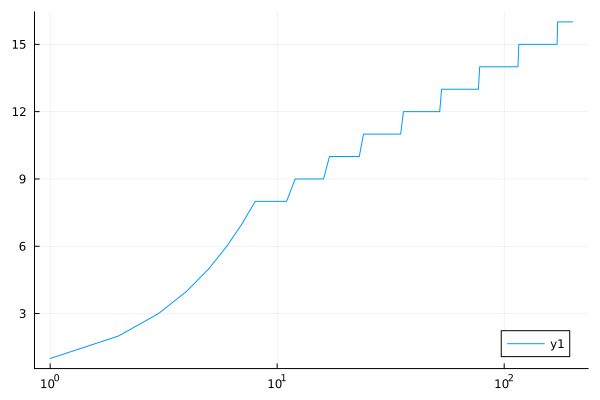

In [21]:
hilbertmatrix(n) = [1/(k + j - 1) for k=1:n, j=1:n]

plot([svdcompress_rank(hilbertmatrix(n), 1E-10) for n=1:200], xscale=:log10)

Solving differential equation from lab 7:

In [22]:
function forwardeuler(a, n)
    h = 1/n
    d = [1.0; fill(1/h, n)]
    dl = fill(-(a+1/h), n)
    Bidiagonal(d,dl,:L)
end

forwardeuler (generic function with 1 method)

Conditional numbers:

In [23]:
A = [1 2 3;
     3 4 5;
     1 5 2]
opnorm(A)*opnorm(inv(A)) ≈ cond(A)

true

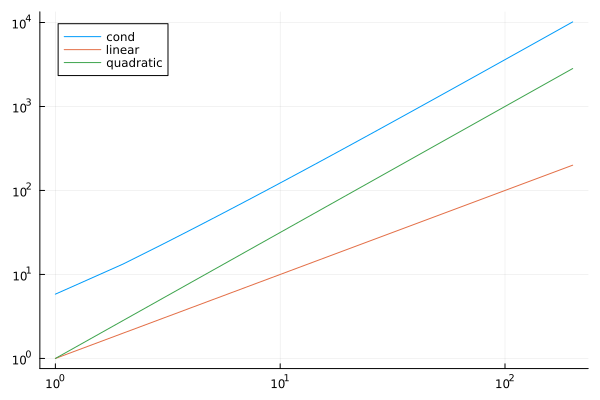

In [24]:
plot([cond(forwardeuler(1, n)) for n = 1:200]; yscale=:log10, xscale=:log10, label="cond")
plot!(1:200; label="linear")
plot!((1:200) .^ (3/2); label="quadratic")

# appears to be between $Cn$ and $Cn^2$ growth. This means we expect errors to grow
# as fast as $ϵ_{\rm m} n$.